In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-tweets-sentiment-dataset/Tweets.csv


In [2]:
data = pd.read_csv('/kaggle/input/twitter-tweets-sentiment-dataset/Tweets.csv')
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


<Axes: xlabel='sentiment'>

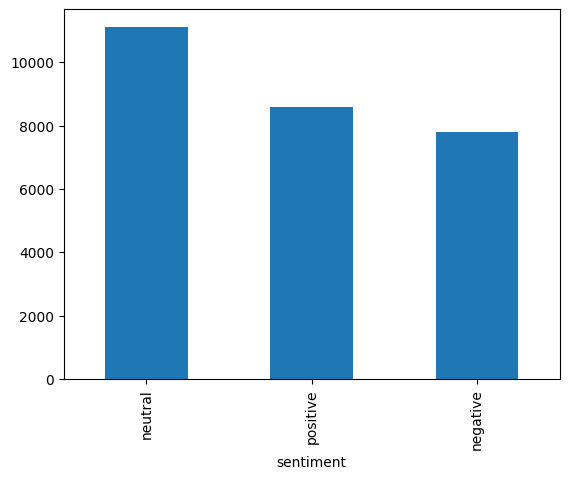

In [3]:
#Visualizing the destrubtions of emotions
import matplotlib.pyplot as plt
data['sentiment'].value_counts().plot(kind='bar')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# Simplified example with dummy data
data = pd.DataFrame({
    'textID': range(27481),
    'text': [f"Texte {i}" for i in range(27481)],  # Replace with text data
    'sentiment': np.random.choice(['positive', 'negative', 'neutral'], size=27481) # Replace with true labels
})

# Vectorisation du texte
vectorizer = TfidfVectorizer(max_features=5000) # Keep the 5000 most frequent words

X = vectorizer.fit_transform(data['text'])  
y = data['sentiment']

print("X.shape:", X.shape) 
print("y.shape:", y.shape) 

X.shape: (27481, 5000)
y.shape: (27481,)


In [5]:
#converting a collection of raw text documents into a matrix
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,        
    ngram_range=(1, 2),       
    stop_words='english'      
)

X = vectorizer.fit_transform(data['text'])
y = data['sentiment']

In [6]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=1/4, random_state=42, stratify=y)

I will try two models Logistic Regression and Random Forest

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(max_iter=1000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      2253
     neutral       0.00      0.00      0.00      2304
    positive       0.34      1.00      0.50      2314

    accuracy                           0.34      6871
   macro avg       0.11      0.33      0.17      6871
weighted avg       0.11      0.34      0.17      6871



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=50, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      2253
     neutral       0.00      0.00      0.00      2304
    positive       0.34      1.00      0.50      2314

    accuracy                           0.34      6871
   macro avg       0.11      0.33      0.17      6871
weighted avg       0.11      0.34      0.17      6871



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
#Optimization with GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=3, scoring='accuracy')
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

# Test final
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.3361960213488598
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      2253
     neutral       0.00      0.00      0.00      2304
    positive       0.34      1.00      0.50      2314

    accuracy                           0.34      6871
   macro avg       0.11      0.33      0.17      6871
weighted avg       0.11      0.34      0.17      6871



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model focuses on majority classes have the best results because they are the most frequent in the dataset.

In [10]:
#we use VotingClassifier or Stacking and combine several basic models (LR, NB, SVC) to unite their strengths:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

voting = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(C=1, solver='liblinear')),
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('svc', SVC(kernel='linear', probability=True))
    ],
    voting='soft'
)
voting.fit(x_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, solver='liblinear')),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [11]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.33677776160675305
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      2253
     neutral       0.00      0.00      0.00      2304
    positive       0.34      1.00      0.50      2314

    accuracy                           0.34      6871
   macro avg       0.11      0.33      0.17      6871
weighted avg       0.11      0.34      0.17      6871



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


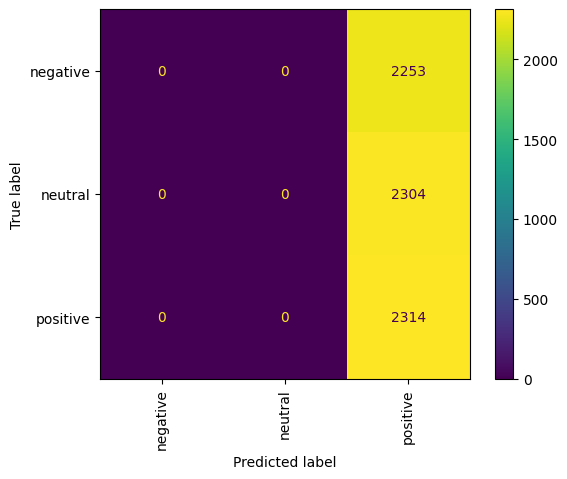

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical')
plt.show()